In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

In [3]:
data = pd.read_csv("../datasets/PCA.csv")
samples = data['Sample'].values
spectra = data.drop(columns=['Device', 'Folder', 'Temp', 'Sample']).values

spectra = (spectra - spectra.mean(axis=0)) / spectra.std(axis=0)

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(samples)

In [4]:
num_classes = len(np.unique(encoded_labels))

inputs = Input(shape=(spectra.shape[1],))
x = Dense(512, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
X_train, X_val, y_train, y_val = train_test_split(spectra, encoded_labels, test_size=2/11)
history = model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=32)
        #   callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0938 - loss: 5.3331 - val_accuracy: 0.3808 - val_loss: 2.3447
Epoch 2/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5192 - loss: 1.6753 - val_accuracy: 0.5348 - val_loss: 1.5607
Epoch 3/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6971 - loss: 0.9726 - val_accuracy: 0.6127 - val_loss: 1.2263
Epoch 4/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7955 - loss: 0.6456 - val_accuracy: 0.6544 - val_loss: 1.0917
Epoch 5/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.5085 - val_accuracy: 0.6884 - val_loss: 0.9750
Epoch 6/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8653 - loss: 0.3960 - val_accuracy: 0.6879 - val_loss: 0.9662
Epoch 7/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8849 - loss: 0.3484 - val_accuracy: 0.7191 - val_loss: 0.9429
Epoch 8/50
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8986 - loss: 0.3089 - val_accuracy: 0.

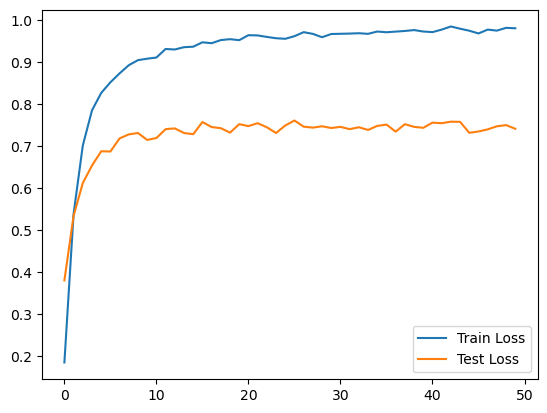

In [6]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Test Loss')
plt.legend()
plt.show()

In [7]:
def find_similar_classifier(model, query_spectrum, top_n=3):
    query = (query_spectrum - spectra.mean(axis=0)) / spectra.std(axis=0)
    probs = model.predict(np.array([query]))[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    return label_encoder.inverse_transform(top_indices), probs[top_indices]

In [8]:
spec_id = 0
top_n = 3

#------------------------------------------------------------------

my_spectrum = spectra[spec_id]

finded_classes = find_similar_classifier(model, my_spectrum, top_n)

print(f"Sample <{data["Sample"].iloc[spec_id]}>({spec_id}) test for {top_n} classes:")
for i in range(top_n):
    print(f"    <{finded_classes[0][i]}> by {finded_classes[1][i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sample <zn5>(0) test for 3 classes:
    <zn5> by 1.0
    <147> by 1.6295031730201304e-12
    <zn613> by 3.9152990067735025e-14
